# Particle name prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from IPython.display import Image
from sklearn.metrics import log_loss

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("ultdataset.csv")

In [4]:
df

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer33,Layer34,Layer35,Layer36,Layer37,Layer38,Layer39,Layer40,Beam Energy,Particle
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,13.75550,9.54401,11.20690,7.76882,4.04211,1.02878,0.00000,1.443850,300,ele
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,11.72670,5.71907,6.14952,3.77939,9.07730,1.57805,0.00000,0.673109,300,ele
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,12.90330,6.34586,10.02230,5.76236,3.23882,1.32135,0.00000,0.000000,300,ele
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,6.56424,2.21363,12.74250,5.27991,5.18920,0.00000,0.00000,0.000000,300,ele
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,10.62380,6.06490,13.94180,7.57974,3.18496,0.00000,0.00000,0.000000,300,ele
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,13.02580,6.40018,5.32122,12.80920,6.69577,1.37853,1.49050,1.003560,200,muon
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,16.35610,14.24660,11.63200,11.69070,4.52460,1.06547,6.94639,2.387170,200,muon
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,15.42560,7.69472,14.90430,22.06300,8.79396,2.04097,1.23077,0.788855,200,muon
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,9.78310,8.41551,6.44172,5.41960,6.38096,1.53922,0.00000,0.472999,200,muon


### Particle name prediction with Beam Energy as a numerical(quantitative) variable

In [5]:
def split_dataset(df):
    # Separating the target variable
    X = df.drop("Particle", inplace=False, axis=1)
    Y = df["Particle"]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                        test_size = 0.2, 
                                                        random_state = 100, 
                                                        shuffle = True)
    y_test.to_csv("Test data.csv")
    return X, Y, X_train, X_test, y_train, y_test

In [6]:
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
                                      random_state = 100,
                                      max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [7]:
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy",
                                         random_state = 100,
                                         max_depth = 3,
                                         min_samples_leaf = 5)    
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [8]:
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    indices = list(X_test.index)
    data = {"Index": indices, "Prediction": y_pred}
    y_pred_df = pd.DataFrame(data = data)
    print(y_pred_df)
    y_pred_df.to_csv("Predictions.csv", index=False)
    return y_pred

In [9]:
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [10]:
def exp1():
      
    # Building Phase
    data = df
    X, Y, X_train, X_test, y_train, y_test = split_dataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    print("Actual results:")
    print(y_test)
    # Operational Phase
    print()
    print("Predictions Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    
    cal_accuracy(y_test, y_pred_gini)
    print()
    print("Predictions Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      

In [11]:
exp1()

Actual results:
69      ele
29      ele
471    muon
344    pion
54      ele
       ... 
460    muon
152     ele
154     ele
56      ele
392    pion
Name: Particle, Length: 100, dtype: object

Predictions Using Gini Index:
    Index Prediction
0      69        ele
1      29        ele
2     471       muon
3     344       pion
4      54        ele
..    ...        ...
95    460       muon
96    152       pion
97    154        ele
98     56        ele
99    392       pion

[100 rows x 2 columns]
Confusion Matrix: 
 [[41  0  4]
 [ 0 20  2]
 [ 0  1 32]]
Accuracy :  93.0
Report :                precision    recall  f1-score   support

         ele       1.00      0.91      0.95        45
        muon       0.95      0.91      0.93        22
        pion       0.84      0.97      0.90        33

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.93      0.93       100


Predictions Using Entropy:
    Index

### Particle name prediction with Beam Energy as a categorical variable (dummies)

In [40]:
def one_hot_encoder(df, columns):
    df = pd.get_dummies(data = df, columns = columns)
    return df

In [26]:
#change beam energies to categorical variables as H for high and L for low

In [43]:
cat_df = df.copy()

In [44]:
cat_df

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer33,Layer34,Layer35,Layer36,Layer37,Layer38,Layer39,Layer40,Beam Energy,Particle
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,13.75550,9.54401,11.20690,7.76882,4.04211,1.02878,0.00000,1.443850,300,ele
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,11.72670,5.71907,6.14952,3.77939,9.07730,1.57805,0.00000,0.673109,300,ele
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,12.90330,6.34586,10.02230,5.76236,3.23882,1.32135,0.00000,0.000000,300,ele
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,6.56424,2.21363,12.74250,5.27991,5.18920,0.00000,0.00000,0.000000,300,ele
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,10.62380,6.06490,13.94180,7.57974,3.18496,0.00000,0.00000,0.000000,300,ele
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,13.02580,6.40018,5.32122,12.80920,6.69577,1.37853,1.49050,1.003560,200,muon
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,16.35610,14.24660,11.63200,11.69070,4.52460,1.06547,6.94639,2.387170,200,muon
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,15.42560,7.69472,14.90430,22.06300,8.79396,2.04097,1.23077,0.788855,200,muon
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,9.78310,8.41551,6.44172,5.41960,6.38096,1.53922,0.00000,0.472999,200,muon


In [45]:
cat_df["Beam Energy"].replace(to_replace = [200, 250, 300],
                                   inplace=True, 
                                   value = "H")

In [46]:
cat_df["Beam Energy"].replace(to_replace = 20, inplace=True, value = "L")

In [47]:
cat_df

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer33,Layer34,Layer35,Layer36,Layer37,Layer38,Layer39,Layer40,Beam Energy,Particle
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,13.75550,9.54401,11.20690,7.76882,4.04211,1.02878,0.00000,1.443850,H,ele
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,11.72670,5.71907,6.14952,3.77939,9.07730,1.57805,0.00000,0.673109,H,ele
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,12.90330,6.34586,10.02230,5.76236,3.23882,1.32135,0.00000,0.000000,H,ele
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,6.56424,2.21363,12.74250,5.27991,5.18920,0.00000,0.00000,0.000000,H,ele
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,10.62380,6.06490,13.94180,7.57974,3.18496,0.00000,0.00000,0.000000,H,ele
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,13.02580,6.40018,5.32122,12.80920,6.69577,1.37853,1.49050,1.003560,H,muon
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,16.35610,14.24660,11.63200,11.69070,4.52460,1.06547,6.94639,2.387170,H,muon
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,15.42560,7.69472,14.90430,22.06300,8.79396,2.04097,1.23077,0.788855,H,muon
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,9.78310,8.41551,6.44172,5.41960,6.38096,1.53922,0.00000,0.472999,H,muon


In [18]:
cat_df.to_csv("beam_energies_H_or_L.csv")

In [48]:
cat_df = one_hot_encoder(cat_df, ["Beam Energy"])

In [49]:
cat_df

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer34,Layer35,Layer36,Layer37,Layer38,Layer39,Layer40,Particle,Beam Energy_H,Beam Energy_L
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,9.54401,11.20690,7.76882,4.04211,1.02878,0.00000,1.443850,ele,1,0
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,5.71907,6.14952,3.77939,9.07730,1.57805,0.00000,0.673109,ele,1,0
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,6.34586,10.02230,5.76236,3.23882,1.32135,0.00000,0.000000,ele,1,0
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,2.21363,12.74250,5.27991,5.18920,0.00000,0.00000,0.000000,ele,1,0
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,6.06490,13.94180,7.57974,3.18496,0.00000,0.00000,0.000000,ele,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,6.40018,5.32122,12.80920,6.69577,1.37853,1.49050,1.003560,muon,1,0
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,14.24660,11.63200,11.69070,4.52460,1.06547,6.94639,2.387170,muon,1,0
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,7.69472,14.90430,22.06300,8.79396,2.04097,1.23077,0.788855,muon,1,0
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,8.41551,6.44172,5.41960,6.38096,1.53922,0.00000,0.472999,muon,1,0


In [50]:
def exp2():
      
    # Building Phase
    data = cat_df
    X, Y, X_train, X_test, y_train, y_test = split_dataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    print("Actual results:")
    print(y_test)
    # Operational Phase
    print()
    print("Predictions Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)  
    cal_accuracy(y_test, y_pred_gini)
    print()
    print("Predictions Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      

In [51]:
exp2()

Actual results:
69      ele
29      ele
471    muon
344    pion
54      ele
       ... 
460    muon
152     ele
154     ele
56      ele
392    pion
Name: Particle, Length: 100, dtype: object

Predictions Using Gini Index:
    Index Prediction
0      69        ele
1      29        ele
2     471       muon
3     344       pion
4      54        ele
..    ...        ...
95    460       muon
96    152       pion
97    154        ele
98     56        ele
99    392       pion

[100 rows x 2 columns]
Confusion Matrix: 
 [[40  0  5]
 [ 0 20  2]
 [ 0  1 32]]
Accuracy :  92.0
Report :                precision    recall  f1-score   support

         ele       1.00      0.89      0.94        45
        muon       0.95      0.91      0.93        22
        pion       0.82      0.97      0.89        33

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.92      0.92       100


Predictions Using Entropy:
    Index

## Displaying correlations 

To see the correlations with our target(particle name in this case) we need to convert them into dummy variables. (corr does not work with strings)

In [53]:
cat_df

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer34,Layer35,Layer36,Layer37,Layer38,Layer39,Layer40,Particle,Beam Energy_H,Beam Energy_L
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,9.54401,11.20690,7.76882,4.04211,1.02878,0.00000,1.443850,ele,1,0
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,5.71907,6.14952,3.77939,9.07730,1.57805,0.00000,0.673109,ele,1,0
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,6.34586,10.02230,5.76236,3.23882,1.32135,0.00000,0.000000,ele,1,0
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,2.21363,12.74250,5.27991,5.18920,0.00000,0.00000,0.000000,ele,1,0
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,6.06490,13.94180,7.57974,3.18496,0.00000,0.00000,0.000000,ele,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,6.40018,5.32122,12.80920,6.69577,1.37853,1.49050,1.003560,muon,1,0
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,14.24660,11.63200,11.69070,4.52460,1.06547,6.94639,2.387170,muon,1,0
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,7.69472,14.90430,22.06300,8.79396,2.04097,1.23077,0.788855,muon,1,0
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,8.41551,6.44172,5.41960,6.38096,1.53922,0.00000,0.472999,muon,1,0


In [54]:
dum_df = one_hot_encoder(cat_df, columns=["Particle"])

In [55]:
dum_df

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer36,Layer37,Layer38,Layer39,Layer40,Beam Energy_H,Beam Energy_L,Particle_ele,Particle_muon,Particle_pion
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,7.76882,4.04211,1.02878,0.00000,1.443850,1,0,1,0,0
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,3.77939,9.07730,1.57805,0.00000,0.673109,1,0,1,0,0
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,5.76236,3.23882,1.32135,0.00000,0.000000,1,0,1,0,0
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,5.27991,5.18920,0.00000,0.00000,0.000000,1,0,1,0,0
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,7.57974,3.18496,0.00000,0.00000,0.000000,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,12.80920,6.69577,1.37853,1.49050,1.003560,1,0,0,1,0
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,11.69070,4.52460,1.06547,6.94639,2.387170,1,0,0,1,0
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,22.06300,8.79396,2.04097,1.23077,0.788855,1,0,0,1,0
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,5.41960,6.38096,1.53922,0.00000,0.472999,1,0,0,1,0


In [56]:
corr_matrix = dum_df.corr()

In [57]:
corr_with_beam = dum_df.corrwith(dum_df["Beam Energy_H"])

In [58]:
corr_with_beam.sort_values(ascending=False)

Beam Energy_H    1.000000
Layer17          0.458883
Layer18          0.457220
Layer19          0.452426
Layer16          0.448724
Layer20          0.445183
Layer14          0.442944
Layer15          0.441329
Layer13          0.433484
Layer12          0.428407
Layer21          0.424557
Layer11          0.421139
Layer10          0.413864
Particle_muon    0.408248
Layer9           0.405303
Layer22          0.400029
Layer23          0.398326
Layer8           0.396518
Layer7           0.375455
Layer6           0.364235
Layer24          0.356391
Layer25          0.349033
Layer5           0.342582
Layer4           0.309911
Layer27          0.307024
Layer28          0.288569
Layer26          0.278930
Layer3           0.271522
Layer33          0.262774
Layer34          0.260360
Layer32          0.259798
Layer35          0.256632
Layer31          0.255277
Layer29          0.252552
Layer30          0.252146
Layer36          0.246980
Layer37          0.234411
Layer38          0.216996
Layer2      

In [68]:
print(corr_matrix["Particle_ele"].sort_values(ascending=False))

Particle_ele     1.000000
Layer7           0.614910
Layer8           0.608467
Layer5           0.607955
Layer6           0.606559
Layer9           0.602827
Layer10          0.601084
Layer4           0.596024
Layer11          0.590298
Layer12          0.577798
Layer3           0.577724
Layer13          0.564610
Layer14          0.546771
Layer2           0.528933
Layer15          0.524832
Layer16          0.489280
Layer1           0.479653
Layer17          0.462963
Layer18          0.406173
Layer19          0.367772
Layer20          0.298001
Layer21          0.219006
Beam Energy_L    0.166667
Layer22          0.152455
Layer23          0.101936
Layer24         -0.002223
Layer25         -0.038454
Layer26         -0.108500
Layer27         -0.147016
Beam Energy_H   -0.166667
Layer28         -0.181290
Layer40         -0.208850
Layer39         -0.217812
Layer38         -0.252123
Layer29         -0.256112
Layer36         -0.263425
Layer37         -0.282779
Layer35         -0.285384
Layer34     

In [59]:
corr_matrix[["Particle_pion", "Particle_muon", "Particle_ele"]]

,Particle_pion,Particle_muon,Particle_ele
Layer1,-0.152766,-0.400354,0.479653
Layer2,-0.281563,-0.302965,0.528933
Layer3,-0.332822,-0.299943,0.577724
Layer4,-0.352625,-0.298102,0.596024
Layer5,-0.361899,-0.301356,0.607955
Layer6,-0.368192,-0.291940,0.606559
Layer7,-0.376408,-0.292104,0.614910
Layer8,-0.367596,-0.295006,0.608467
Layer9,-0.362754,-0.294027,0.602827
Layer10,-0.360369,-0.294814,0.601084


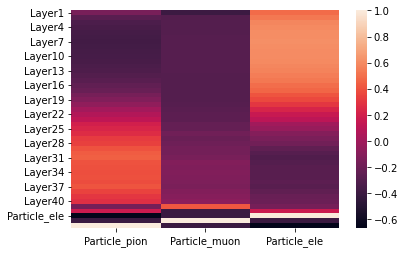

In [60]:
heatmap= sns.heatmap(corr_matrix[["Particle_pion", "Particle_muon", "Particle_ele"]])

### Particle Name Prediction with Beam Energy column removed

In [61]:
df_be_removed = df.drop(labels="Beam Energy", axis=1, inplace=False)

In [62]:
df_be_removed

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer32,Layer33,Layer34,Layer35,Layer36,Layer37,Layer38,Layer39,Layer40,Particle
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,4.43253,13.75550,9.54401,11.20690,7.76882,4.04211,1.02878,0.00000,1.443850,ele
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,4.61008,11.72670,5.71907,6.14952,3.77939,9.07730,1.57805,0.00000,0.673109,ele
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,1.45063,12.90330,6.34586,10.02230,5.76236,3.23882,1.32135,0.00000,0.000000,ele
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,1.81827,6.56424,2.21363,12.74250,5.27991,5.18920,0.00000,0.00000,0.000000,ele
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,0.00000,10.62380,6.06490,13.94180,7.57974,3.18496,0.00000,0.00000,0.000000,ele
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,3.83413,13.02580,6.40018,5.32122,12.80920,6.69577,1.37853,1.49050,1.003560,muon
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,4.43904,16.35610,14.24660,11.63200,11.69070,4.52460,1.06547,6.94639,2.387170,muon
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,1.43588,15.42560,7.69472,14.90430,22.06300,8.79396,2.04097,1.23077,0.788855,muon
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,5.30894,9.78310,8.41551,6.44172,5.41960,6.38096,1.53922,0.00000,0.472999,muon


In [63]:
def exp3():
      
    # Building Phase
    data = df_be_removed
    X, Y, X_train, X_test, y_train, y_test = split_dataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    print("Actual results:")
    print(y_test)
    # Operational Phase
    print()
    print("Predictions Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)  
    cal_accuracy(y_test, y_pred_gini)
    print()
    print("Predictions Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      

In [64]:
exp3()

Actual results:
69      ele
29      ele
471    muon
344    pion
54      ele
       ... 
460    muon
152     ele
154     ele
56      ele
392    pion
Name: Particle, Length: 100, dtype: object

Predictions Using Gini Index:
    Index Prediction
0      69        ele
1      29        ele
2     471       muon
3     344       muon
4      54        ele
..    ...        ...
95    460       muon
96    152       muon
97    154        ele
98     56        ele
99    392       muon

[100 rows x 2 columns]
Confusion Matrix: 
 [[41  1  3]
 [ 0 19  3]
 [ 0  5 28]]
Accuracy :  88.0
Report :                precision    recall  f1-score   support

         ele       1.00      0.91      0.95        45
        muon       0.76      0.86      0.81        22
        pion       0.82      0.85      0.84        33

    accuracy                           0.88       100
   macro avg       0.86      0.87      0.87       100
weighted avg       0.89      0.88      0.88       100


Predictions Using Entropy:
    Index

## Introducing New Features

### 1: Energy ratios 
First start with creating a new parameter taking the ratios of the energies in layers from 1 to 28 and layers from 29 to 40. 

In [65]:
df

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer33,Layer34,Layer35,Layer36,Layer37,Layer38,Layer39,Layer40,Beam Energy,Particle
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,13.75550,9.54401,11.20690,7.76882,4.04211,1.02878,0.00000,1.443850,300,ele
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,11.72670,5.71907,6.14952,3.77939,9.07730,1.57805,0.00000,0.673109,300,ele
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,12.90330,6.34586,10.02230,5.76236,3.23882,1.32135,0.00000,0.000000,300,ele
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,6.56424,2.21363,12.74250,5.27991,5.18920,0.00000,0.00000,0.000000,300,ele
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,10.62380,6.06490,13.94180,7.57974,3.18496,0.00000,0.00000,0.000000,300,ele
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,13.02580,6.40018,5.32122,12.80920,6.69577,1.37853,1.49050,1.003560,200,muon
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,16.35610,14.24660,11.63200,11.69070,4.52460,1.06547,6.94639,2.387170,200,muon
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,15.42560,7.69472,14.90430,22.06300,8.79396,2.04097,1.23077,0.788855,200,muon
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,9.78310,8.41551,6.44172,5.41960,6.38096,1.53922,0.00000,0.472999,200,muon


In [117]:
#Sum of the energies in layers from 1 to 28 for each event.
energylist_1_28 = []
for i in range(len(df.values)):
    energy_1_28 = 0
    for j in range(28):
        energy_1_28 += df.values[i][j]
    energylist_1_28.append(energy_1_28)

In [121]:
len(energylist)

500

In [122]:
energylist_28_40 = []
for i in range(len(df.values)):
    energy_28_40 = 0
    for j in range(28, 40):
        energy_28_40 += df.values[i][j]
    energylist_28_40.append(energy_28_40)

In [123]:
energylist_28_40

[70.45288,
 78.36825900000001,
 74.80307,
 61.59281,
 76.94882000000001,
 154.00999199999998,
 72.6675,
 51.71228000000001,
 70.746149,
 100.30681799999999,
 79.57217,
 63.36294,
 88.9308,
 56.621705,
 68.071782,
 64.989631,
 79.150661,
 64.52218099999999,
 80.99581999999998,
 81.84557099999999,
 77.55147000000001,
 65.62237999999999,
 48.77260999999999,
 74.40287099999998,
 71.66834,
 89.16005000000001,
 93.848148,
 56.56809499999999,
 85.326219,
 85.370842,
 94.670204,
 367.26174100000003,
 122.43482099999999,
 109.662052,
 71.07991000000001,
 66.36692,
 59.02139999999999,
 64.21109,
 41.06792699999999,
 152.89572,
 55.363062,
 84.11057000000001,
 52.364325,
 82.08964,
 82.2661,
 70.12299,
 154.35116999999997,
 56.723324,
 62.641304000000005,
 92.558285,
 60.491049000000004,
 92.37361,
 100.635659,
 45.38564,
 95.82005,
 38.870419999999996,
 100.92218000000001,
 76.449386,
 114.04066600000002,
 63.33371999999999,
 62.65093,
 63.975373,
 58.60045000000001,
 72.19230000000002,
 98.1573

In [144]:
#First extra parameter
energy_ratios= []
for i in range(len(energylist_1_28)):
    energy_ratio = energylist_1_28[i]/energylist_28_40[i]
    energy_ratios.append(energy_ratio)

In [199]:
df_extra_features = df.copy()

In [200]:
df_extra_features["Ratio of Energies(1-28/29-40)"] = energy_ratios


In [214]:
df_extra_features.rename(columns={"Ratio of Energies(1-28/29-40)": "Energy Ratios"}, inplace=True)

### 2: Peak energy values and the layers at peak values

In [182]:
peak_val_list_1_28= []
peak_layer_list_1_28 = []
for i in range(len(df.values)):
    peak_val_1_28 = max(df.values[i][:28])
    peak_layer_1_28 = list(df.values[i][:28]).index(peak_val_1_28) +1
    peak_val_list_1_28.append(peak_val_1_28)
    peak_layer_list_1_28.append(peak_layer_1_28)

In [183]:
peak_val_list_28_40= []
peak_layer_list_28_40 = []
for i in range(len(df.values)):
    peak_val_28_40 = max(df.values[i][28:40])
    peak_layer_28_40 = list(df.values[i][28:40]).index(peak_val_28_40) +1
    peak_val_list_28_40.append(peak_val_28_40)
    peak_layer_list_28_40.append(peak_layer_28_40)

In [202]:
df_extra_features["Layer At Peak Value_1-28"] = peak_layer_list_1_28
df_extra_features["Layer At Peak Value_29-40"] = peak_layer_list_28_40
df_extra_features["Energy At Peak Value_1-28"] = peak_val_list_1_28 
df_extra_features["Energy At Peak Value_28_40"]= peak_val_list_28_40

In [203]:
df_extra_features

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer38,Layer39,Layer40,Beam Energy,Particle,Ratio of Energies(1-28/29-40),Layer At Peak Value_1-28,Layer At Peak Value_29-40,Energy At Peak Value_1-28,Energy At Peak Value_28_40
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,1.02878,0.00000,1.443850,300,ele,394.138059,9,5,3145.13000,13.7555
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,1.57805,0.00000,0.673109,300,ele,348.624365,9,1,2654.14000,29.9530
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,1.32135,0.00000,0.000000,300,ele,368.576072,11,1,2637.43000,26.0762
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,0.00000,0.00000,0.000000,300,ele,451.852645,7,2,2679.29000,16.2764
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,0.00000,0.00000,0.000000,300,ele,354.230086,11,1,2486.37000,24.1294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,1.37853,1.49050,1.003560,200,muon,1.959906,22,5,20.07620,13.0258
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,1.06547,6.94639,2.387170,200,muon,0.614023,25,5,4.89613,16.3561
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,2.04097,1.23077,0.788855,200,muon,0.648864,19,8,12.34400,22.0630
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,1.53922,0.00000,0.472999,200,muon,0.926998,28,5,7.70011,9.7831


In [190]:
#Saving our new dataset 
df_extra_features.to_csv("dataset_extra_features.csv")

### Prediction with our new dataset with extra features:

In [204]:
def exp4():
      
    # Building Phase
    data = df_extra_features
    X, Y, X_train, X_test, y_train, y_test = split_dataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    print("Actual results:")
    print(y_test)
    # Operational Phase
    print()
    print("Predictions Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)  
    cal_accuracy(y_test, y_pred_gini)
    print()
    print("Predictions Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)

In [205]:
exp4()

Actual results:
69      ele
29      ele
471    muon
344    pion
54      ele
       ... 
460    muon
152     ele
154     ele
56      ele
392    pion
Name: Particle, Length: 100, dtype: object

Predictions Using Gini Index:
    Index Prediction
0      69        ele
1      29        ele
2     471       muon
3     344       pion
4      54        ele
..    ...        ...
95    460       muon
96    152       pion
97    154        ele
98     56        ele
99    392       pion

[100 rows x 2 columns]
Confusion Matrix: 
 [[43  0  2]
 [ 0 20  2]
 [ 1  0 32]]
Accuracy :  95.0
Report :                precision    recall  f1-score   support

         ele       0.98      0.96      0.97        45
        muon       1.00      0.91      0.95        22
        pion       0.89      0.97      0.93        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100


Predictions Using Entropy:
    Index

Our new features did really improve the accuracy! Let's look at the correlations.


## Correlations with the new features

In [216]:
df_extra_features

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer38,Layer39,Layer40,Beam Energy,Particle,Energy Ratios,Layer At Peak Value_1-28,Layer At Peak Value_29-40,Energy At Peak Value_1-28,Energy At Peak Value_28_40
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,1.02878,0.00000,1.443850,300,ele,394.138059,9,5,3145.13000,13.7555
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,1.57805,0.00000,0.673109,300,ele,348.624365,9,1,2654.14000,29.9530
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,1.32135,0.00000,0.000000,300,ele,368.576072,11,1,2637.43000,26.0762
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,0.00000,0.00000,0.000000,300,ele,451.852645,7,2,2679.29000,16.2764
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,0.00000,0.00000,0.000000,300,ele,354.230086,11,1,2486.37000,24.1294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,1.37853,1.49050,1.003560,200,muon,1.959906,22,5,20.07620,13.0258
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,1.06547,6.94639,2.387170,200,muon,0.614023,25,5,4.89613,16.3561
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,2.04097,1.23077,0.788855,200,muon,0.648864,19,8,12.34400,22.0630
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,1.53922,0.00000,0.472999,200,muon,0.926998,28,5,7.70011,9.7831


In [217]:
df_extra_features = one_hot_encoder(df_extra_features, ["Particle"])

In [227]:
corr_matrix_2 = df_extra_features.corr()

In [240]:
corr_matrix_2 = corr_matrix_2[["Particle_ele", 
              "Particle_muon",
              "Particle_pion"]]

In [245]:
corr_matrix_2 = corr_matrix_2[41:46]

In [246]:
corr_matrix_2

,Particle_ele,Particle_muon,Particle_pion
Energy Ratios,0.647078,-0.273394,-0.423853
Layer At Peak Value_1-28,-0.536210,0.378404,0.227244
Layer At Peak Value_29-40,-0.061605,0.246129,-0.139359
Energy At Peak Value_1-28,0.573080,-0.349779,-0.287487
Energy At Peak Value_28_40,-0.364096,-0.183409,0.513848


<AxesSubplot:>

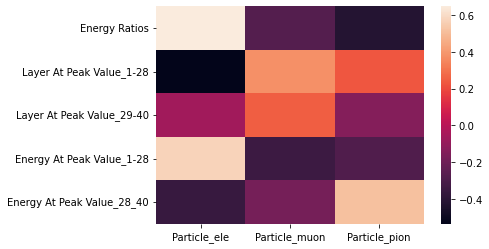

In [247]:
sns.heatmap(corr_matrix_2)

Results are like what we expected.

### Prediction with new features and the Beam Energy column removed 

In [206]:
def exp5():
      
    # Building Phase
    data = df_extra_features.drop(labels= "Beam Energy", axis=1, inplace=False)
    X, Y, X_train, X_test, y_train, y_test = split_dataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    print("Actual results:")
    print(y_test)
    # Operational Phase
    print()
    print("Predictions Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)  
    cal_accuracy(y_test, y_pred_gini)
    print()
    print("Predictions Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)

In [207]:
exp5()

Actual results:
69      ele
29      ele
471    muon
344    pion
54      ele
       ... 
460    muon
152     ele
154     ele
56      ele
392    pion
Name: Particle, Length: 100, dtype: object

Predictions Using Gini Index:
    Index Prediction
0      69        ele
1      29        ele
2     471       muon
3     344       pion
4      54        ele
..    ...        ...
95    460       muon
96    152       muon
97    154        ele
98     56        ele
99    392       pion

[100 rows x 2 columns]
Confusion Matrix: 
 [[43  1  1]
 [ 0 20  2]
 [ 1  2 30]]
Accuracy :  93.0
Report :                precision    recall  f1-score   support

         ele       0.98      0.96      0.97        45
        muon       0.87      0.91      0.89        22
        pion       0.91      0.91      0.91        33

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100


Predictions Using Entropy:
    Index

Removing the beam energy reduces the accuracy.

### Prediction with low energies removed

In [261]:
df_high_energy = df.copy()

In [262]:
df_high_energy["Layer At Peak Value_1-28"] = peak_layer_list_1_28
df_high_energy["Layer At Peak Value_29-40"] = peak_layer_list_28_40
df_high_energy["Energy At Peak Value_1-28"] = peak_val_list_1_28 
df_high_energy["Energy At Peak Value_28_40"]= peak_val_list_28_40

In [263]:
df_high_energy

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer37,Layer38,Layer39,Layer40,Beam Energy,Particle,Layer At Peak Value_1-28,Layer At Peak Value_29-40,Energy At Peak Value_1-28,Energy At Peak Value_28_40
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,4.04211,1.02878,0.00000,1.443850,300,ele,9,5,3145.13000,13.7555
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,9.07730,1.57805,0.00000,0.673109,300,ele,9,1,2654.14000,29.9530
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,3.23882,1.32135,0.00000,0.000000,300,ele,11,1,2637.43000,26.0762
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,5.18920,0.00000,0.00000,0.000000,300,ele,7,2,2679.29000,16.2764
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,3.18496,0.00000,0.00000,0.000000,300,ele,11,1,2486.37000,24.1294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,6.69577,1.37853,1.49050,1.003560,200,muon,22,5,20.07620,13.0258
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,4.52460,1.06547,6.94639,2.387170,200,muon,25,5,4.89613,16.3561
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,8.79396,2.04097,1.23077,0.788855,200,muon,19,8,12.34400,22.0630
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,6.38096,1.53922,0.00000,0.472999,200,muon,28,5,7.70011,9.7831


In [264]:
df_high_energy = df_high_energy[df_high_energy["Beam Energy"]>=200]

In [265]:
df_high_energy

,Layer1,Layer2,Layer3,Layer4,Layer5,Layer6,Layer7,Layer8,Layer9,Layer10,...,Layer37,Layer38,Layer39,Layer40,Beam Energy,Particle,Layer At Peak Value_1-28,Layer At Peak Value_29-40,Energy At Peak Value_1-28,Energy At Peak Value_28_40
0,77.66750,259.46000,792.90200,1239.53000,1980.100000,2386.750000,3089.27000,2696.600000,3145.130000,2149.210000,...,4.04211,1.02878,0.00000,1.443850,300,ele,9,5,3145.13000,13.7555
1,38.42920,104.51000,371.66200,603.23100,1079.270000,1288.220000,1780.75000,2124.150000,2654.140000,2243.690000,...,9.07730,1.57805,0.00000,0.673109,300,ele,9,1,2654.14000,29.9530
2,45.87910,84.95750,234.06200,326.84000,747.987000,1189.420000,1276.22000,1621.180000,2513.580000,2167.400000,...,3.23882,1.32135,0.00000,0.000000,300,ele,11,1,2637.43000,26.0762
3,430.59100,361.49100,838.59600,1177.32000,1897.690000,2585.080000,2679.29000,2515.590000,2648.980000,2107.160000,...,5.18920,0.00000,0.00000,0.000000,300,ele,7,2,2679.29000,16.2764
4,161.45900,32.52370,215.43900,474.61400,1038.740000,1268.180000,1672.78000,1824.650000,2239.280000,1999.550000,...,3.18496,0.00000,0.00000,0.000000,300,ele,11,1,2486.37000,24.1294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.19195,8.26787,1.44395,2.55059,1.397010,1.168870,1.31133,2.762510,1.478290,1.073920,...,6.69577,1.37853,1.49050,1.003560,200,muon,22,5,20.07620,13.0258
496,1.18656,2.07798,2.14504,1.04400,1.079860,0.801306,1.30868,1.594340,1.210860,2.192870,...,4.52460,1.06547,6.94639,2.387170,200,muon,25,5,4.89613,16.3561
497,1.05722,1.53828,1.05049,1.53319,3.637990,0.989049,1.75165,1.084330,0.978782,0.868786,...,8.79396,2.04097,1.23077,0.788855,200,muon,19,8,12.34400,22.0630
498,1.02478,2.87172,1.17401,1.45174,0.977608,1.571210,1.27423,0.778268,1.143040,0.929430,...,6.38096,1.53922,0.00000,0.472999,200,muon,28,5,7.70011,9.7831


In [266]:
def exp6():
      
    # Building Phase
    data = df_high_energy
    X, Y, X_train, X_test, y_train, y_test = split_dataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
    print("Actual results:")
    print(y_test)
    # Operational Phase
    print()
    print("Predictions Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)  
    cal_accuracy(y_test, y_pred_gini)
    print()
    print("Predictions Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)

In [267]:
exp6()

Actual results:
422    muon
239    pion
416    muon
401    muon
449    muon
234    pion
228    pion
88      ele
27      ele
488    muon
259    pion
7       ele
406    muon
297    pion
262    pion
18      ele
482    muon
418    muon
60      ele
497    muon
400    muon
271    pion
249    pion
256    pion
410    muon
266    pion
299    pion
298    pion
212    pion
269    pion
431    muon
268    pion
15      ele
421    muon
430    muon
242    pion
461    muon
210    pion
46      ele
279    pion
75      ele
291    pion
56      ele
224    pion
211    pion
486    muon
295    pion
10      ele
225    pion
448    muon
64      ele
478    muon
1       ele
23      ele
433    muon
203    pion
277    pion
19      ele
413    muon
41      ele
Name: Particle, dtype: object

Predictions Using Gini Index:
    Index Prediction
0     422       muon
1     239       pion
2     416       muon
3     401       muon
4     449       muon
5     234       pion
6     228       pion
7      88        ele
8      27     

In [268]:
df_high_energy.to_csv("df_high_energy.csv")